<a href="https://colab.research.google.com/github/JossefaRodriguez/Proyecto-2-_Parte-I/blob/main/EDA_dataset3_Fish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto 2: Análisis Inicial y Selección de Problema

## Búsqueda de Conjuntos de Datos

In [ ]:
# Importar librerias.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Conectar con Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importar el DataFrame.
path = "/content/drive/MyDrive/Colab Notebooks/DataScience BootCamp/Machine Learning/CORES/CORE6/Fish.csv"
df = pd.read_csv(path)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


- Se utilizará el dataset Fish Market, tiene un tamaño de 159 registros, 7 columnas.
- Variables:
    Species: tipo de pez (categoría)

    Weight: peso del pez (variable objetivo)

    Length1, Length2, Length3: medidas de longitud

    Height, Width: medidas del cuerpo

In [ ]:
# Se utiliza lower y replace para limpiar.
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   species  159 non-null    object 
 1   weight   159 non-null    float64
 2   length1  159 non-null    float64
 3   length2  159 non-null    float64
 4   length3  159 non-null    float64
 5   height   159 non-null    float64
 6   width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


### Análisis Exploratorio de Datos (EDA) Inicial





In [ ]:
# comenzaremos identificando posibles valores nulos
df.isna().sum()

,0
species,0
weight,0
length1,0
length2,0
length3,0
height,0
width,0


In [ ]:
# verificaremos valores duplicados dentro del dataset
df.duplicated().sum()

np.int64(0)

In [ ]:
# Se toma una muestra aleatoria del dataset para conocer el comportamiento de algunos datos
df.sample(10)

,species,weight,length1,length2,length3,height,width
69,Parkki,200.0,21.2,23.0,25.8,10.3458,3.6636
129,Pike,300.0,31.7,34.0,37.8,5.7078,4.1580
71,Parkki,300.0,24.0,26.0,29.0,11.3680,4.2340
67,Parkki,170.0,19.0,20.7,23.2,9.3960,3.4104
6,Bream,500.0,26.8,29.7,34.5,14.1795,5.2785
152,Smelt,9.9,11.3,11.8,13.1,2.2139,1.1659
5,Bream,450.0,26.8,29.7,34.7,13.6024,4.9274
143,Pike,1550.0,56.0,60.0,64.0,9.6000,6.1440
51,Roach,180.0,23.6,25.2,27.9,7.0866,3.9060
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200


In [ ]:
# se realizará un analisis estadistico descrptivo
df.describe().T

,count,mean,std,min,25%,50%,75%,max
weight,159.0,398.326415,357.978317,0.0000,120.00000,273.0000,650.0000,1650.000
length1,159.0,26.247170,9.996441,7.5000,19.05000,25.2000,32.7000,59.000
length2,159.0,28.415723,10.716328,8.4000,21.00000,27.3000,35.5000,63.400
length3,159.0,31.227044,11.610246,8.8000,23.15000,29.4000,39.6500,68.000
height,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957
width,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142


quizás podrían existir valores fuera de rango en la variable weight por lo que se analizará

In [ ]:
# Se identificaran posibles valores atipicos en la variable wight según lo visualizado en la descripcion estaditica
Q1 = df['weight'].quantile(0.25) # se calcula quartil 1
Q3 = df['weight'].quantile(0.75) # Se calcula cuartil 3
IQR = Q3 - Q1 # Se calcula el intercuartilico
fuera_rango = df[(df['weight'] < Q1 - 1.5 * IQR) | (df['weight'] > Q3 + 1.5 * IQR)]
fuera_rango


,species,weight,length1,length2,length3,height,width
142,Pike,1600.0,56.0,60.0,64.0,9.600,6.144
143,Pike,1550.0,56.0,60.0,64.0,9.600,6.144
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.480


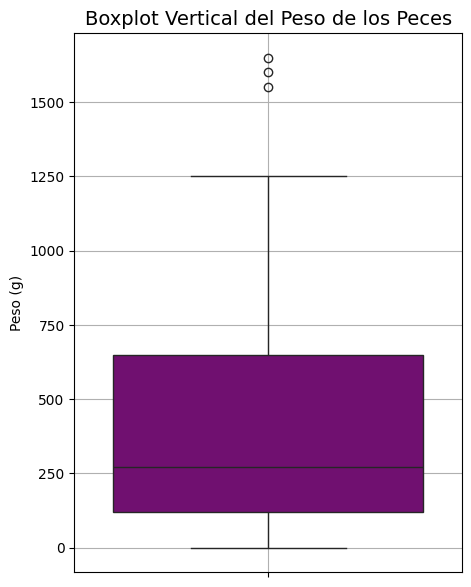

In [ ]:
# Se generará grafico para hacer mas visual los valores atipicos en la distribucion de la variable weight
plt.figure(figsize=(5, 7))
sns.boxplot(y=df['weight'], color='purple')
plt.title('Boxplot Vertical del Peso de los Peces', fontsize=14)
plt.ylabel('Peso (g)')
plt.grid(True)
plt.show()

#### Analisis
- La mayoría de los valores de Weight están concentrados entre aproximadamente 120g y 650g, justo como los cuartiles Q1 y Q3 indicaban.

- Se ven claramente al menos tres puntos fuera del rango superior (por sobre el límite de 1.5 × IQR), lo que confirma la presencia de outliers altos.

- No hay valores atípicos por debajo del rango, lo cual es interesante considerando que el mínimo es 0g.

#### Conclusion de los valores atipicos
- para este caso se eliminarán estos valores atipicos debido a que la idea de generar un modelo predictivo mas adelantes es que sea para la mayoria de los casos y no para casos extremos por lo que mantenerlos podria afectar negativamente esos modelos

In [ ]:
# Eliminaremos los valores atipicos
Q1 = df['weight'].quantile(0.25)
Q3 = df['weight'].quantile(0.75)
IQR = Q3 - Q1

# Definiremos los límites inferior y superior
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtraremos los datos dentro del rango permitido
df = df[(df['weight'] >= limite_inferior) & (df['weight'] <= limite_superior)]

<Axes: ylabel='weight'>

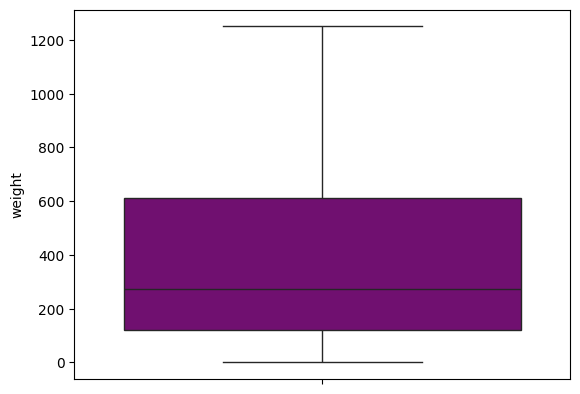

In [ ]:
# Se verifica si quedaron fuera
sns.boxplot(y=df['weight'], color='purple')

Se realizará una matriz de correlacion para ver la correlacion que existe entre las variables del dataset

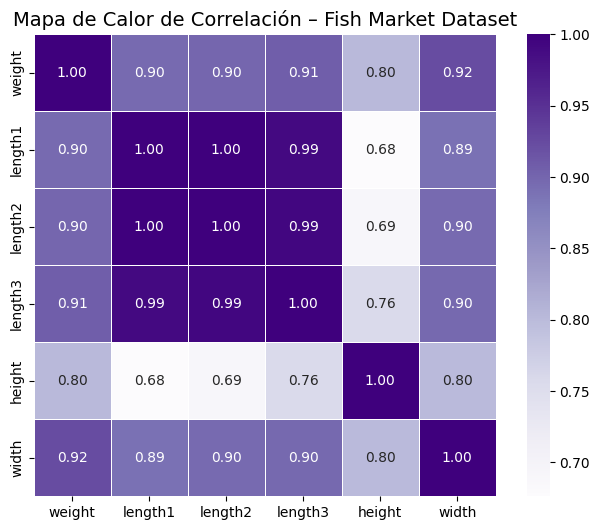

In [ ]:
# Se filtran las variables numéricas
df_numerico = df.select_dtypes(include=['int64', 'float64'])

# Calcula la matriz de correlación sólo con variables numéricas
matriz_correlacion = df_numerico.corr()

# Crea el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacion, annot=True, fmt=".2f", cmap="Purples", square=True, linewidths=0.5)
plt.title("Mapa de Calor de Correlación – Fish Market Dataset", fontsize=14)
plt.show()


#### Analisis
El gráfico muestra que el peso (Weight) del pez está fuertemente relacionado con el ancho (Width) y la longitud total (Length3). Aunque las tres medidas de longitud son distintas, están muy correlacionadas entre sí y ofrecen información similar. Para evitar redundancia en el modelo, conviene usar solo una — idealmente la que tenga mejor correlación con el peso — y complementar con Width

### Diagnóstico y Selección de Problema

#### Diagnostico
- El dataset tiene 159 registros y solo variables numéricas y una categórica (Species)

- No se encontraron valores nulos ni duplicados

- Se detectaron valores atipicos extremos en la variable Weight, que fueron tratados

Se observaron fuertes correlaciones entre Weight y variables como Width, Length3, lo que sugiere potencial predictivo

#### Seleccion del problema
- Debido a que la variable Weight es numérica continua, el objetivo del análisis será predecir su valor en función de otras medidas morfológicas del pez. Para ello, se aplicará una técnica de regresión multivariable, que permite estimar el peso utilizando múltiples variables independientes como longitud, ancho y altura.

#### Justificación
- Poder estimar el peso de un pez a partir de medidas morfológicas resulta especialmente útil en contextos como la industria pesquera, donde se requiere clasificar o valorar ejemplares sin necesidad de pesarlos. Por ello, es esencial seleccionar las variables más relevantes para la predicción, como el ancho y una longitud representativa. Además, el tratamiento adecuado de los valores atípicos permite mejorar la precisión del modelo y evitar que casos extremos distorsionen los resultados